<a href="https://colab.research.google.com/github/GRIMxREAPER770/covid-in-india/blob/main/premier_league.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of data:
   season_end_year            team  position  played  won  drawn  lost  gf  \
0             1993  Manchester Utd         1      42   24     12     6  67   
1             1993     Aston Villa         2      42   21     11    10  57   
2             1993    Norwich City         3      42   21      9    12  61   
3             1993       Blackburn         4      42   20     11    11  68   
4             1993             QPR         5      42   17     12    13  63   

   ga  gd  points                                 notes  
0  31  36      84  → Champions League via league finish  
1  40  17      74          → UEFA Cup via league finish  
2  65  -4      72        → UEFA Cup via league finish 1  
3  46  22      71                                   NaN  
4  55   8      63                                   NaN  

Summary of dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 12 columns):
 #   Column           Non-Null Coun

/tmp/ipython-input-1402471142.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams.values, y=top_teams.index, palette="viridis")


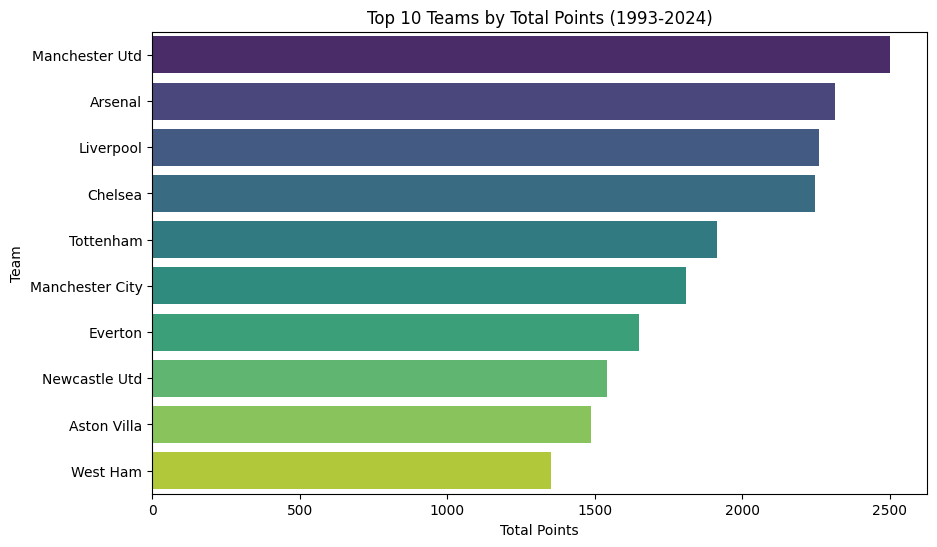

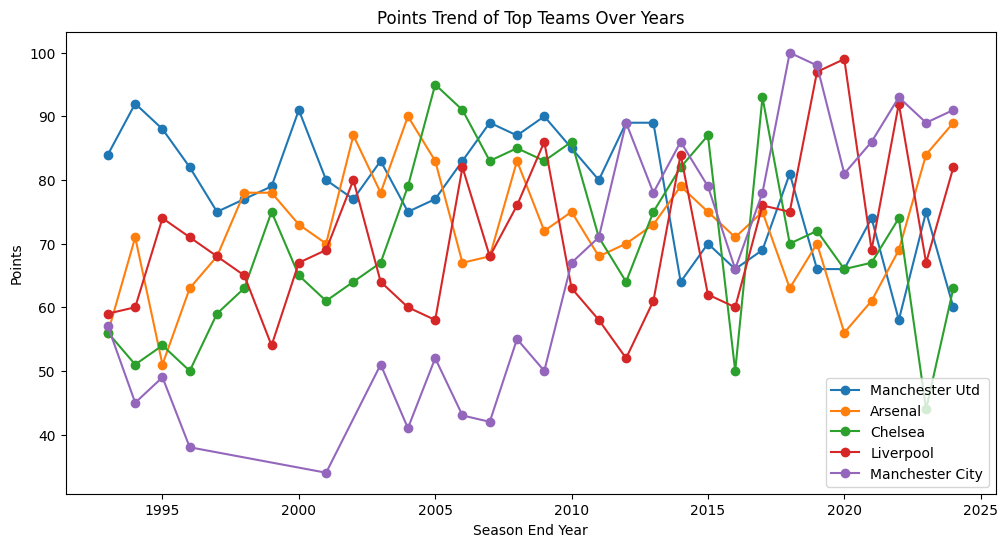

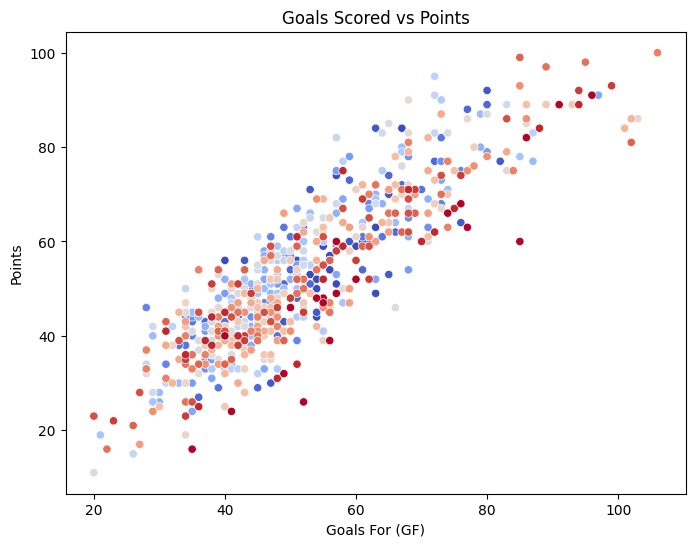

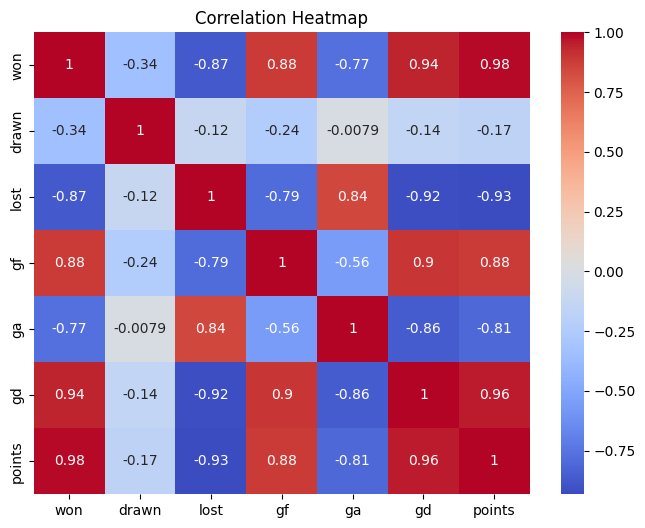

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------ LOAD DATA ------------------
file_path = '/content/pl-tables-1993-2024.csv'   # change path if needed
data = pd.read_csv(file_path)

# ------------------ BASIC ANALYSIS ------------------
print("First 5 rows of data:")
print(data.head())

print("\nSummary of dataset:")
print(data.info())

print("\nStatistical summary:")
print(data.describe())

# ------------------ TOP TEAMS ------------------
top_teams = data.groupby("team")["points"].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Teams by Total Points:")
print(top_teams)

plt.figure(figsize=(10,6))
sns.barplot(x=top_teams.values, y=top_teams.index, palette="viridis")
plt.title("Top 10 Teams by Total Points (1993-2024)")
plt.xlabel("Total Points")
plt.ylabel("Team")
plt.show()

# ------------------ POINTS TREND ------------------
plt.figure(figsize=(12,6))
for team in ["Manchester Utd", "Arsenal", "Chelsea", "Liverpool", "Manchester City"]:
    team_data = data[data["team"] == team]
    plt.plot(team_data["season_end_year"], team_data["points"], marker="o", label=team)

plt.title("Points Trend of Top Teams Over Years")
plt.xlabel("Season End Year")
plt.ylabel("Points")
plt.legend()
plt.show()

# ------------------ GOALS ANALYSIS ------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x="gf", y="points", data=data, hue="season_end_year", palette="coolwarm", legend=False)
plt.title("Goals Scored vs Points")
plt.xlabel("Goals For (GF)")
plt.ylabel("Points")
plt.show()

# ------------------ CORRELATION ------------------
plt.figure(figsize=(8,6))
sns.heatmap(data[["won","drawn","lost","gf","ga","gd","points"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
